In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [ ]:
file_path = "dataset_sms_spam_bhs_indonesia_v1/dataset_sms_spam_v1.csv"

df = pd.read_csv(file_path, encoding='latin-1')

In [ ]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['text', 'label']

df.head()

,text,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [ ]:
total_samples = len(df)
print(total_samples)

1143


In [ ]:
print(df.columns)

Index(['text', 'label'], dtype='object')


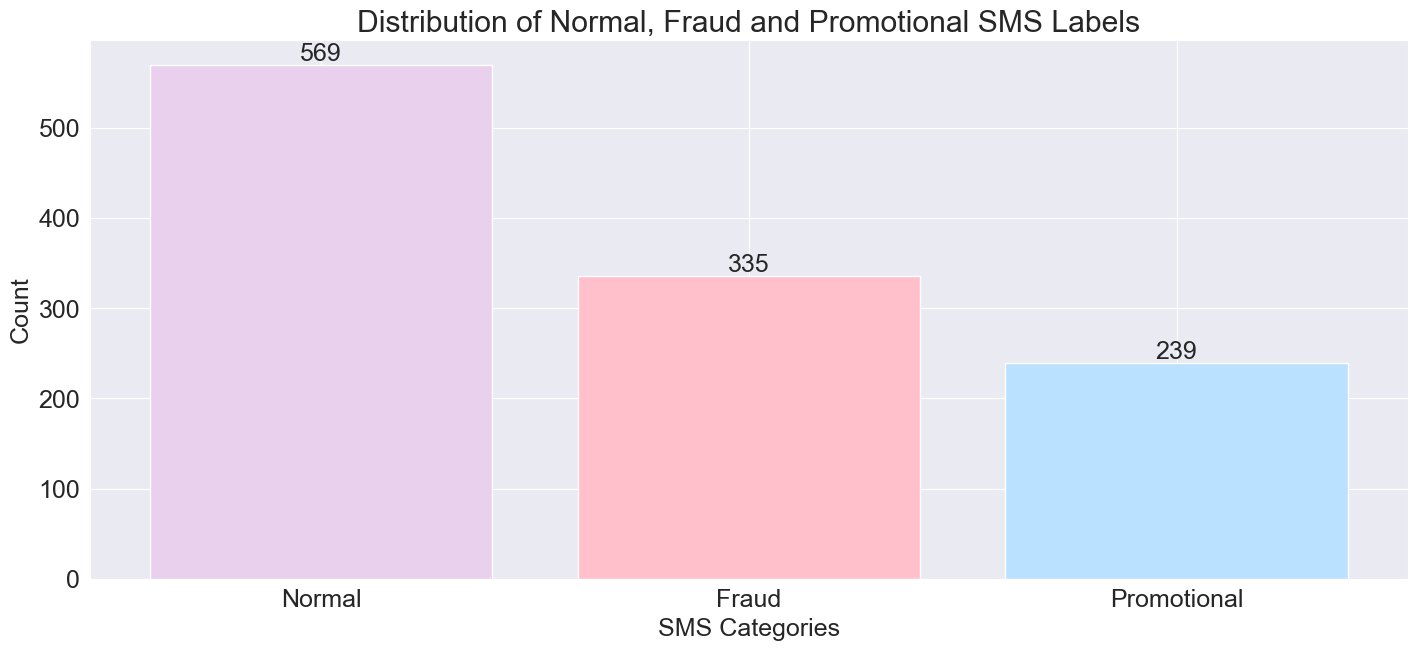

In [ ]:


# Assuming the label counts are stored in the 'label_counts' variable
label_counts = df['label'].value_counts()

# Mapping numerical labels to their corresponding text labels
label_mapping = {0: 'Normal', 1: 'Fraud', 2: 'Promotional'}
label_names = [label_mapping[label] for label in label_counts.index]

# Define RGB colors (normalized to the range [0, 1])
color_directory = {
    'Normal': (233/255, 209/255, 238/255),       # Light pink 	233	209	238
    'Fraud': (255/255, 192/255, 203/255),        # Pink
    'Promotional': (186/255, 225/255, 255/255)   # Light blue
}
colors = [color_directory[label] for label in label_names]

# Creating a bar graph
plt.bar(label_names, label_counts, color=colors)
plt.xlabel('SMS Categories')
plt.ylabel('Count')
plt.title('Distribution of Normal, Fraud and Promotional SMS Labels')

# Display the count on top of each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
lenght = len(df['text'][0])
print(f'Length of a text stuff: {lenght}')

word_count = df['text'][0].split()
print(f'Word count in a text: {len(word_count)}')

Length of a text stuff: 153
Word count in a text: 26


In [ ]:
word_count = df['text'][0].split()
print(f'Word count in a text stuff: {len(word_count)}')

Word count in a text stuff: 26


In [ ]:
df['mean_word_length'] = df['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,text,label,mean_word_length
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,4.884615
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,5.120000
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,6.285714
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,6.333333
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,5.333333


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['text'][0])])

76.0

In [ ]:
df.describe()

,label,mean_word_length
count,1143.000000,1143.000000
mean,0.711286,5.525670
std,0.790001,1.479483
min,0.000000,2.500000
25%,0.000000,4.636364
50%,1.000000,5.272727
75%,1.000000,6.162281
max,2.000000,31.500000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


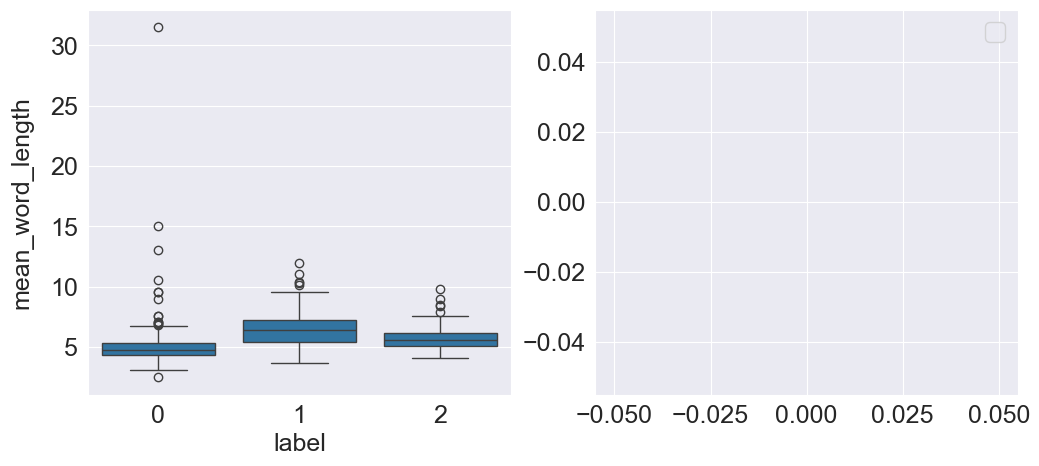

In [ ]:
def visualize(col):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], x=df['label'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1, 2, 2)
    sns.kdeplot(df[df['label'] == '0'][col], label='normal', shade=True)
    sns.kdeplot(df[df['label'] == '1'][col], label='fraud', shade=True)
    sns.kdeplot(df[df['label'] == '2'][col], label='promo', shade=True)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()

    plt.show()

features = df.columns.tolist()[2:]
for feature in features:
    visualize(feature)

In [ ]:
df.groupby('label').describe()

mean_word_length                                                    \
                 count      mean       std       min       25%       50%   
label                                                                      
0                569.0  4.939182  1.509969  2.500000  4.300000  4.743590   
1                335.0  6.414217  1.303371  3.700000  5.422619  6.444444   
2                239.0  5.676500  0.849152  4.111111  5.117692  5.578947   

                       
            75%   max  
label                  
0      5.307692  31.5  
1      7.263158  12.0  
2      6.125000   9.8

In [ ]:
df = df.drop(features, axis=1)
df.head()

,text,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
def clean(text):
    text = text.lower()
    text = re.sub('[^a-z A-Z 0-9-]+', '', text)
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])

    return text

df['text'] = df['text'].apply(clean)
df.head(10)

,text,label
0,promo beli paket flash mulai 1gb di telkomsel ...,2
1,25 gb30 hari hanya rp 35 ribu spesial buat and...,2
2,2016-07-08 114711plg yth sisa kuota flash anda...,2
3,2016-08-07 112947plg yth sisa kuota flash anda...,2
4,45gb30 hari hanya rp 55 ribu spesial buat anda...,2
5,5 hari lagi ekstra pulsa 50rb dg beli paket in...,2
6,ada iring dgn tarif rp 017hr perpanjangan rp 3...,2
7,akhir bulan harus tetap eksis loh internetan p...,2
8,aktifkan iring coboy jr - terhebat tekan 8087 ...,2
9,ambil bonus harianmu di 600 bebas pulsa dptkan...,2


In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

In [ ]:
df['text_list'] = df['text'].apply(corpus)
df.head(10)

,text,label,text_list
0,promo beli paket flash mulai 1gb di telkomsel ...,2,"[promo, beli, paket, flash, mulai, 1gb, di, te..."
1,25 gb30 hari hanya rp 35 ribu spesial buat and...,2,"[25, gb30, hari, hanya, rp, 35, ribu, spesial,..."
2,2016-07-08 114711plg yth sisa kuota flash anda...,2,"[2016-07-08, 114711plg, yth, sisa, kuota, flas..."
3,2016-08-07 112947plg yth sisa kuota flash anda...,2,"[2016-08-07, 112947plg, yth, sisa, kuota, flas..."
4,45gb30 hari hanya rp 55 ribu spesial buat anda...,2,"[45gb30, hari, hanya, rp, 55, ribu, spesial, b..."
5,5 hari lagi ekstra pulsa 50rb dg beli paket in...,2,"[5, hari, lagi, ekstra, pulsa, 50rb, dg, beli,..."
6,ada iring dgn tarif rp 017hr perpanjangan rp 3...,2,"[ada, iring, dgn, tarif, rp, 017hr, perpanjang..."
7,akhir bulan harus tetap eksis loh internetan p...,2,"[akhir, bulan, harus, tetap, eksis, loh, inter..."
8,aktifkan iring coboy jr - terhebat tekan 8087 ...,2,"[aktifkan, iring, coboy, jr, -, terhebat, teka..."
9,ambil bonus harianmu di 600 bebas pulsa dptkan...,2,"[ambil, bonus, harianmu, di, 600, bebas, pulsa..."


In [ ]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['text_list'][i]
len(corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:00<00:00, 112664.26it/s]


18566

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('di', 374),
 ('anda', 286),
 ('ke', 205),
 ('ini', 152),
 ('info', 133),
 ('ada', 130),
 ('yg', 130),
 ('aku', 127),
 ('mau', 120),
 ('dan', 119)]

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

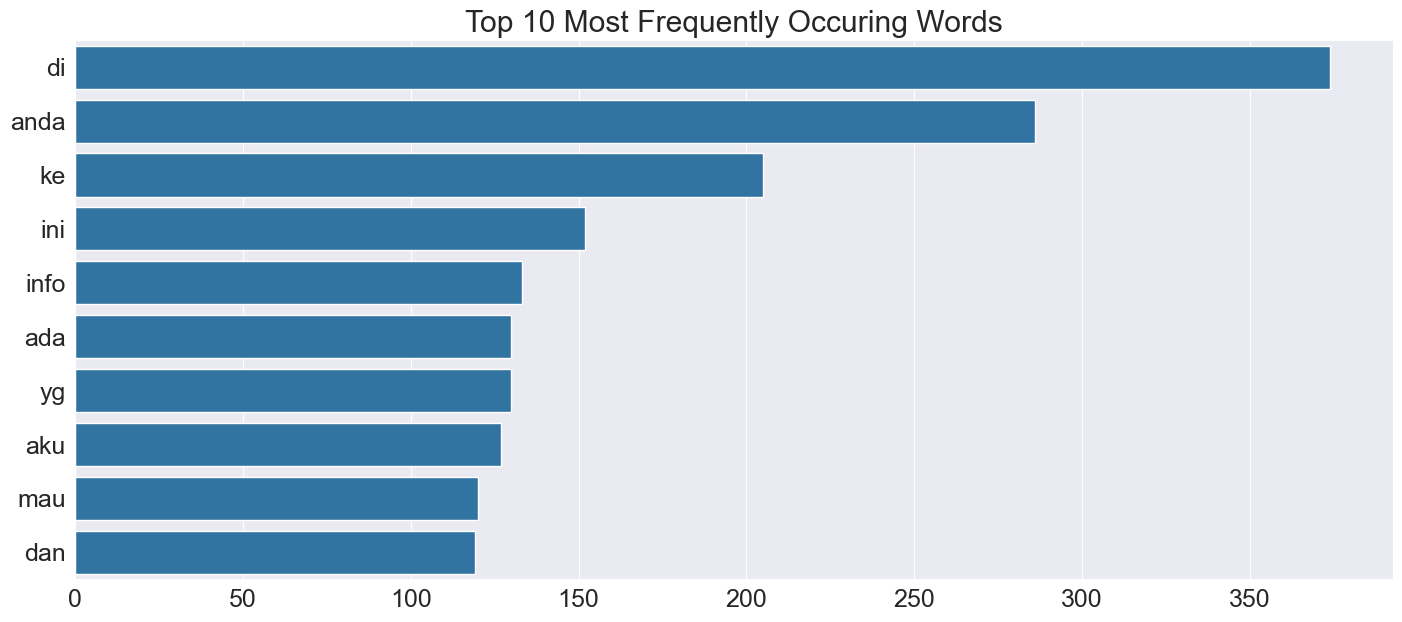

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

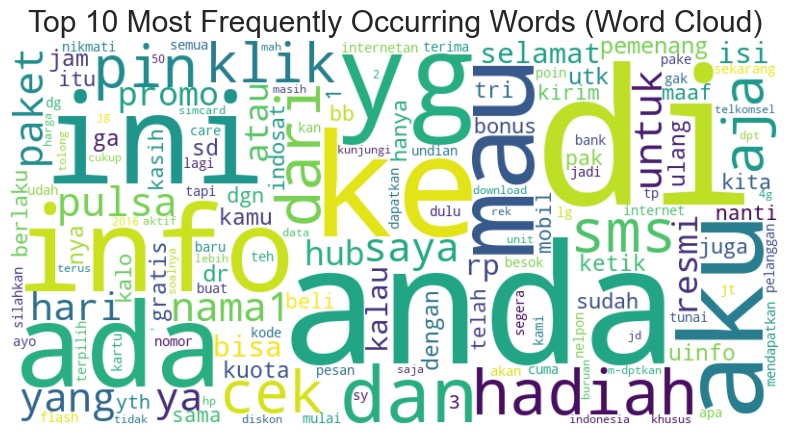

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

corpus = df['text']

# Count occurrences of words in the corpus
most_common = Counter(" ".join(corpus).split()).most_common(150)

# Generate word cloud for the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Most Frequently Occurring Words (Word Cloud)')
plt.show()


In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['text'])

In [ ]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

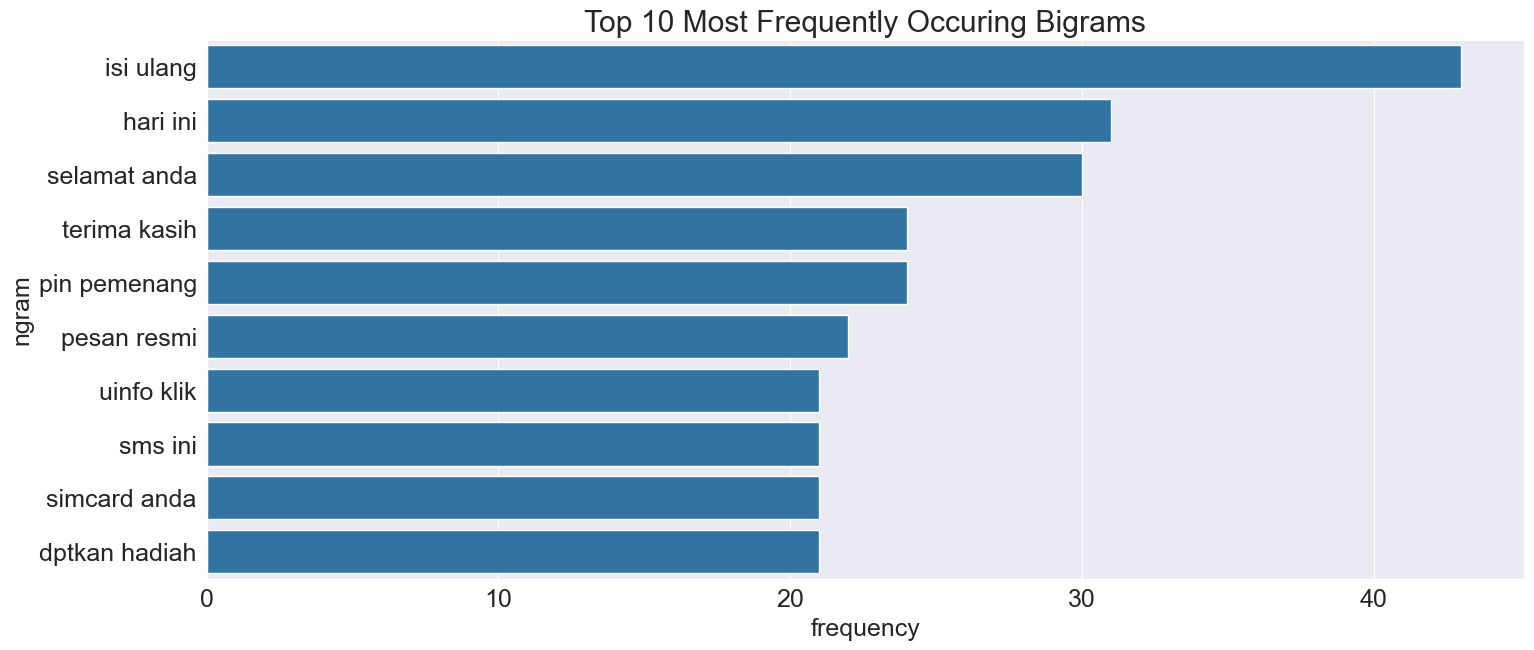

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

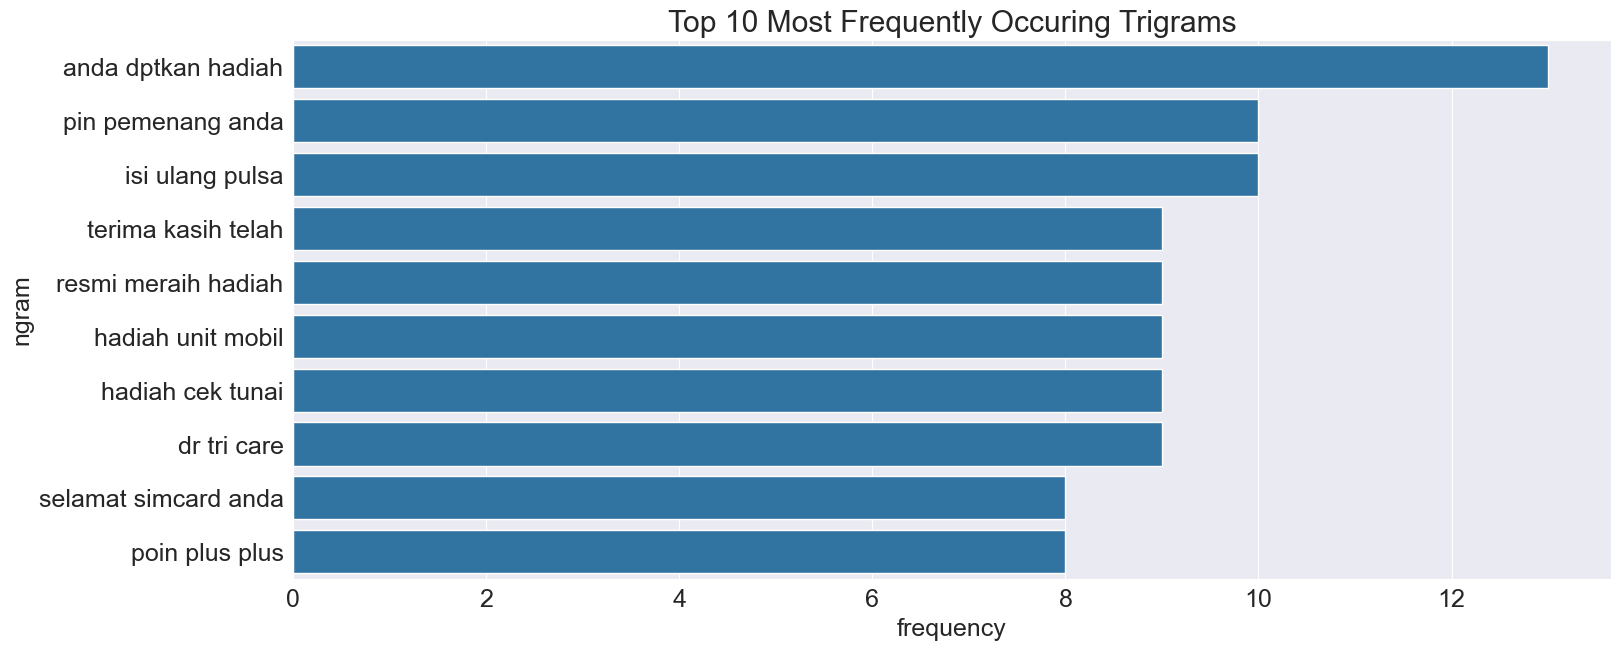

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

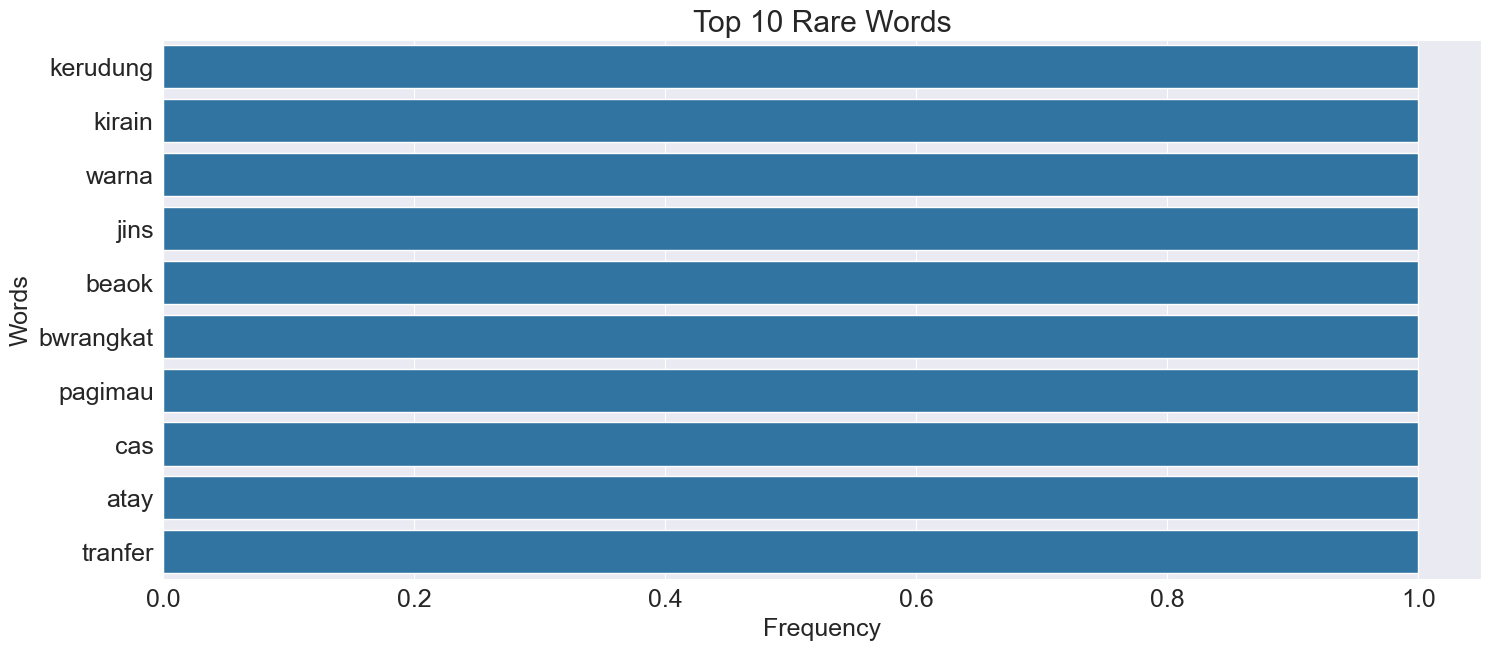

In [ ]:
dnt = Counter()

# Count occurrences of each word
for text in df["text"].values:
    for word in text.split():
        dnt[word] += 1

# Sort Counter object in ascending order
rare_words = dnt.most_common()[-10:]

# Extract rare words and their frequencies
words, freq = zip(*rare_words)

# Plot barplot
sns.barplot(x=freq, y=words)
plt.title('Top 10 Rare Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()